link dashboard: https://public.tableau.com/views/Dashboard_M1_Galih/Story1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

# Milestone 1

#### Galih Sukmanaputra  
#### FTDS  
#### Batch 005

## Identifikasi Masalah

### Latar Belakang 
    Dewasa ini penggunaan mobil sudah menjadi kebutuhan masyarakat luas dalam menunjang segala bentuk aktivitas sehari-hari. Penggunaan mobil yang semakin meningkat tiap waktunya akan berdampak terhadap konsumsi bahan bakar yang semakin tinggi. Hal ini tentunya akan membuat ketersediaan bahan bakar minyak akan semakin menurun. Di sisi lain, jika dilihat dari segi ekologis maka gas pembuangan yang dihasilkan mobil akan semakin meningkat dan tingkat pencemaran udara akan semakin tinggi. Oleh karena itu, diperlukan adanya analisis mengenai tingkat penggunaan mobil dengan tipe tertentu terhadap dampak lingkungan yang dihasilkan.

### Tujuan 
    1. Mengetahui jenis mobil dengan konsumsi bahan bakar tinggi.
    2. Mengetahui perbandingan tipe tiap mobil terhadap potensi emisi yang dihasilkan.
    3. Memberikan rekomendasi kepada stakeholder untuk memprioritaskan tipe mobil yang paling ramah lingkungan.

### Problem Statement 
    Mengetahui perbandingan jumlah konsumsi bahan bakar mobil di wilayah highway dan city berdasarkan jenis kendaraan pada tahun 2022 di Canada.

### Penjabaran masalah
    1. Merk mobil apa dengan rata-rata konsumsi  BBM paling besar tahun 2022?
    2. Sebutkan Vehicle class mobil yang paling ramah lingkungan di tahun 2022?
    3. Jelaskan perbandingan antara FUEL yang digunakan terhadap konsumsi bahan bakar dan emisi yang dihasilkan!
    4. Jenis mobil apa yang penggunaannya harus diprioritaskan ?
    5. Apakah terdapat hubungan antara cylinder terhadap gas emisi yang dihasilkan?
    6. Pemerintah ingin membuat peraturan terkait pembatasan penggunaan mobil dengan emisi < 250, apakah peraturan tersebut dapat diterapkan melihat dari kondisi dari berbagai jenis mobil yang ada?  
    7. Apakah ada keterkaitan variabel antara variabel jenis BBM dan Cylinder, BBM dan Transmission?

## Data Loading

*sumber referensi data : https://www.kaggle.com/datasets/ahmettyilmazz/fuel-consumption

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('Fuel_Consumption_2000-2022.csv')
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [5]:
df.tail()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
22551,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236
22555,2022,Volvo,XC90 T6 AWD,SUV: Standard,2.0,4,AS8,Z,12.4,8.9,10.8,26,252


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


## Data Cleaning

In [101]:
df1 = df[df['YEAR'] == 2022].reset_index()
df1.head()

,index,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,21601,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200
1,21602,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263
2,21603,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232
3,21604,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242
4,21605,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230


Dilakukan filtering dataframe untuk YEAR = 2022 

In [211]:
df_make = df1[['MAKE','FUEL CONSUMPTION']].groupby('MAKE').mean()
top_10 = df_make.sort_values('FUEL CONSUMPTION',ascending=False).head(10)
top_10

,FUEL CONSUMPTION
MAKE,
Bugatti,29.133333
Lamborghini,21.412500
Rolls-Royce,19.985714
Bentley,17.437500
Dodge,15.766667
Maserati,15.415385
Aston Martin,15.140000
GMC,14.809259
Land Rover,14.316667


Berikut ini adalah daftar 10 mobil dengan rata-rata konsumsi BBM tertinggi selama tahun 2022

<AxesSubplot:title={'center':'Merk Mobil dengan Rata - Rata Konsumsi BBM Tertinggi Tahun 2022'}, xlabel='MAKE'>

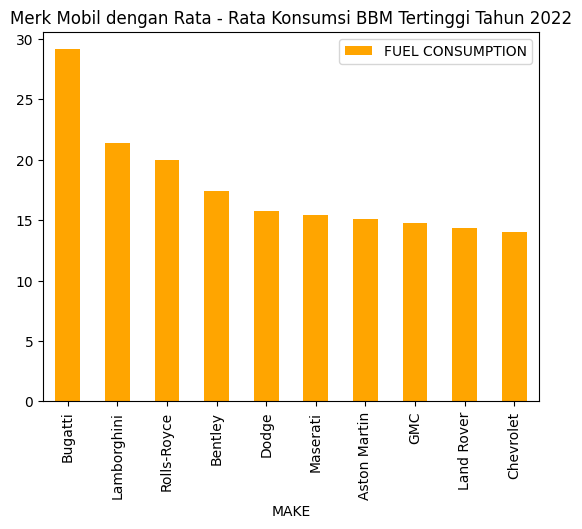

In [130]:
top_10.plot(kind='bar', title='Merk Mobil dengan Rata - Rata Konsumsi BBM Tertinggi Tahun 2022', color='orange')

Diperoleh informasi bahwa merk mobil paling boros adalah Bugatti. Hal ini tentunya, karena Bugatti merupakan mobil yang tergolong supercar sehingga wajar jika mobil ini sangat boros dalam konsumsi bahan bakar.

Mencari kelas mobil yang paling ramah lingkungan di tahun 2022. Kriteria ramah lingkungan dicari berdasarkan rata-rata konsumsi BBM selama 2022. Artinya mobil ramah lingkungan harus berada di bawah rata-rata konsumsi BBM selama satu tahun.

In [124]:
df1['FUEL CONSUMPTION'].mean()


12.548376963350783

Dari nilai rata-rata diketahui bahwa mobil yang tergolong ramah lingkungan harus memiliki besar konsumsi BBM di bawah 12.5 liter

In [128]:
df_green = df1[['VEHICLE CLASS','FUEL CONSUMPTION']].groupby('VEHICLE CLASS').mean()
df_green[df_green['FUEL CONSUMPTION'] <= 12.5]

,FUEL CONSUMPTION
VEHICLE CLASS,
Compact,10.027143
Mid-size,11.300855
Minivan,10.928571
Pickup truck: Small,12.435000
SUV: Small,10.737056
Special purpose vehicle,11.783333
Station wagon: Small,8.989474
Subcompact,12.298734


Berdasarkan data di atas diketahui bahwa kelas mobil paling ramah lingkungan adalah Station wagon: Small

Mencari perbandingan antara jenis FUEL yang digunakan dengan konsumsi bahan bakar dan emisi yang dihasilkan

array([<AxesSubplot:ylabel='FUEL CONSUMPTION'>,
       <AxesSubplot:ylabel='EMISSIONS'>], dtype=object)

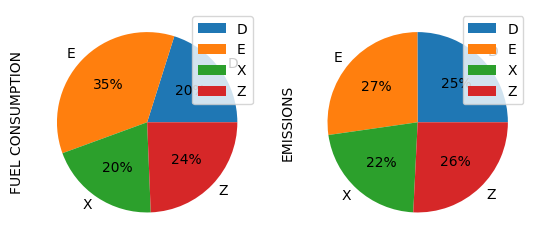

In [156]:
df_fuel = df1.groupby('FUEL')[['FUEL CONSUMPTION','EMISSIONS']].mean()
df_fuel.plot(kind='pie', subplots=True, autopct = '%.0f%%')

Berdasarkan diagram di atas diketahui bahwa rata-rata paling tinggi konsumsi BBM dan emisi yang dihasilkan terdapat pada jenis BBM E. Selain itu, juga diperoleh informasi bahwa semakin boros tipe BBM yang terjadi maka semakin tinggi pula emisi gas yang dihasilkan.

Jenis mobil yang penggunaannya harus diprioritaskan.

In [164]:
df_model_priority = df1[(df1['VEHICLE CLASS'] == 'Station wagon: Small') & (df1['FUEL CONSUMPTION'] <= 12.5)] 
df_model_priority.groupby('MAKE')[['FUEL CONSUMPTION','EMISSIONS']].mean()

,FUEL CONSUMPTION,EMISSIONS
MAKE,,
Audi,9.800000,208.000000
Honda,8.766667,191.333333
Kia,5.575000,132.750000
Mercedes-Benz,11.025000,228.250000
Nissan,9.200000,199.000000
Subaru,9.250000,194.500000
Volvo,11.100000,222.500000


Berikut ini adalah daftar prioritas merk mobil yang harus diprioritaskan penggunaannya, dilihat dari segi efisiensi bahan  bakar dan emisi yang dihasilkan.

<AxesSubplot:title={'center':'Mobil Prioritas Station wagon : Small 2022'}, ylabel='MAKE'>

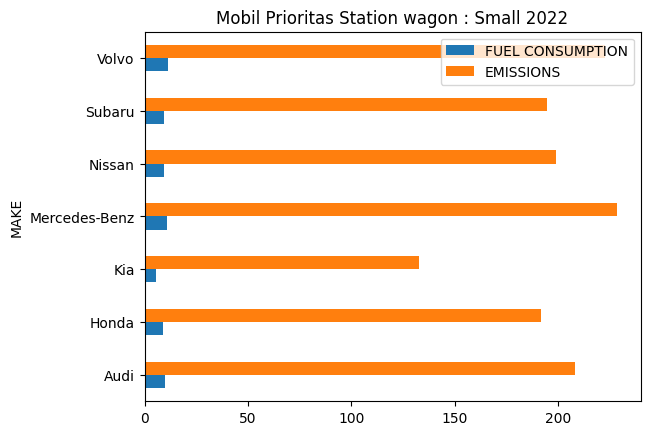

In [168]:
df_green_car = df_model_priority.groupby('MAKE')[['FUEL CONSUMPTION','EMISSIONS']].mean()
df_green_car.plot(kind='barh', title= 'Mobil Prioritas Station wagon : Small 2022')

Merk mobil paling disarankan penggunaannya adalah KIA, Selain itu dari segi harga beli berdasarkan market di pasar otomotif merk mobil KIA cenderung lebih murah dibanding merk mobil lainnya.

<AxesSubplot:xlabel='CYLINDERS'>

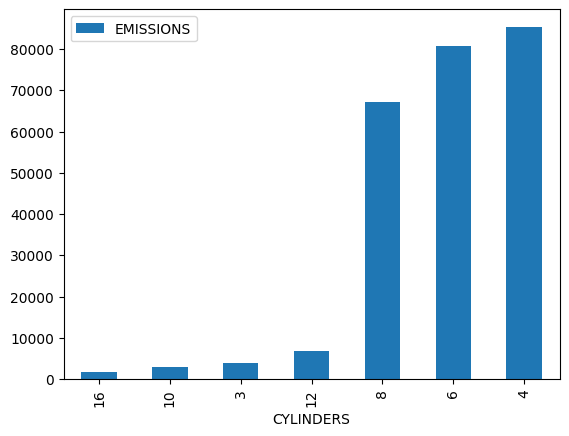

In [186]:
df1.groupby('CYLINDERS')[['EMISSIONS']].sum().sort_values('EMISSIONS').plot(kind='bar')

Di sepanjang tahun 2022 ternyata tingkat emisi paling tinggi terjadi pada mesin dengan jumlah cylinder 4.

<AxesSubplot:xlabel='CYLINDERS'>

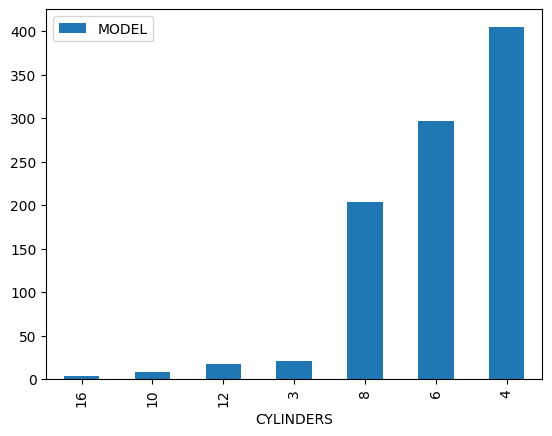

In [184]:
df1.groupby('CYLINDERS').count()[['MODEL']].sort_values('MODEL').plot(kind='bar')

Hal ini juga didukung karena mobil dengan jumlah cylinder 4 paling banyak diproduksi sepanjang 2022. Menurut informasi otomotif mobil dengan tipe 4 cylinder memang paling digemari masyarakat luas karena biaya perawatan dan konsumsi bahan bakar cenderung lebih irit.

## Analisis dan Perhitungan

In [188]:
#cek outliers dari jumlah emisi

df1.head()

,index,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,21601,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200
1,21602,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263
2,21603,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232
3,21604,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242
4,21605,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230


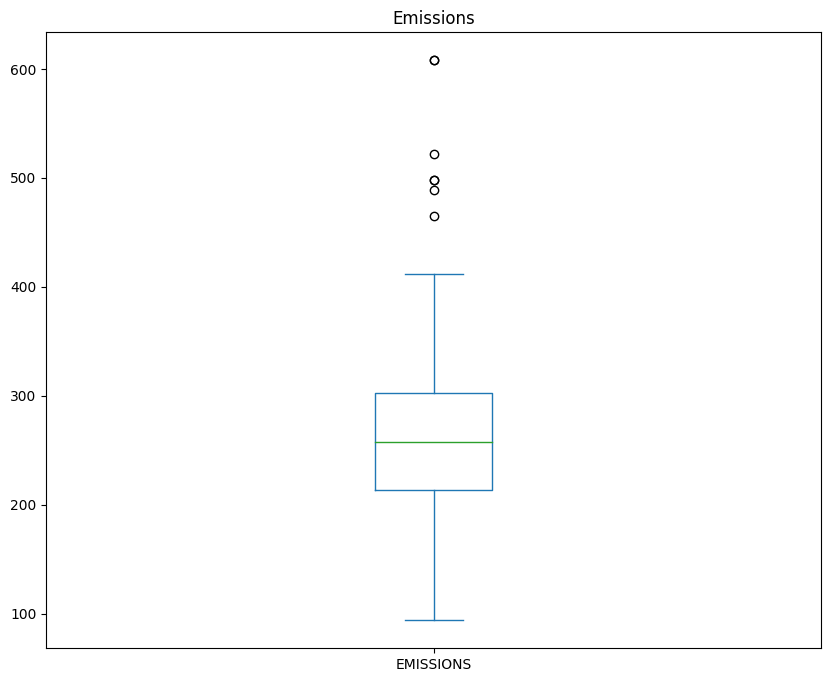

In [189]:
df1['EMISSIONS'].plot(kind='box', title='Emissions', figsize=(10,8))
plt.show()

Cek outliers menggunakan IQR

In [192]:
upper_limit = df1['EMISSIONS'].mean() + 3*df1['EMISSIONS'].std()
lower_limit = df1['EMISSIONS'].mean() - 3*df1['EMISSIONS'].std()

print('upper limit :',upper_limit)
print('lower limit :', lower_limit) #lower limit minus tidak perlu diperhatikan karena berdasarkan box plot tidak terdapat data yang minus

upper limit : 454.45158847483754
lower limit : 65.77040105395827


In [195]:
df1[df1['EMISSIONS'] > upper_limit].shape[0]

7

Jumlah outliers 7

Data bersih dari outliers

In [196]:
df_clean = df1[df1['EMISSIONS'] <= upper_limit]
df_clean.drop('index', axis=1)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
951,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
952,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
953,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236


In [197]:
#Melihat Central Tendency
a = df_clean['EMISSIONS'].mean()
b = df_clean['EMISSIONS'].median()
c = df_clean['EMISSIONS'].mode()

print('mean :', a)
print('median :', b)
print('mode :', c)

mean : 258.1413502109705
median : 257.5
mode : 0    275
dtype: int64


In [200]:
print('range :', (df_clean['EMISSIONS'].max()) - (df_clean['EMISSIONS'].min()))
print('variance :',df_clean['EMISSIONS'].var())
print('standar deviasi :',df_clean['EMISSIONS'].std())

range : 318
variance : 3676.417169030338
standar deviasi : 60.63346575143415


In [206]:
from scipy import stats
import scipy.stats as st

ci = stats.norm.interval(0.95,a,st.sem(df_clean['EMISSIONS']))
ci

(254.2816256352877, 262.00107478665325)

Dari nilai CI yang ada besaran emisi yang dihasilkan harus jatuh pada range 254 - 262. Berdasarkan analisis saya pemerintah dapat menerapkan peraturan pembatasan emisi di bawah 250, karena rata-rata emisi yang dihasilkan masih masuk ke dalam range nilai CI yaitu 254 - 262.

Uji keterkaitan variabel dengan chi-square

In [207]:
contingency_table=pd.crosstab(df_clean['FUEL'],df_clean['CYLINDERS'])
contingency_table

CYLINDERS,3,4,6,8,10,12
FUEL,,,,,,
D,0,5,23,0,0,0
E,0,2,2,10,0,0
X,14,258,108,66,0,0
Z,7,140,164,127,8,14


Setelah dilakukan pengujian antara dua variabel yaitu jenis bahan bakar dan cylinder maka, diperoleh hasil

In [208]:
stat, p, dof, expected = stats.chi2_contingency(contingency_table)
print('p=%.3f' % (p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

p=0.000
Probably dependent


Dua variabel ini saling berkaitan satu sama lain

Selanjutnya uji chi square juga diterapkan pada variabel Transmission dan jenis BBM

In [209]:
contingency_table1=pd.crosstab(df_clean['FUEL'],df_clean['TRANSMISSION'])
contingency_table1

TRANSMISSION,A10,A6,A7,A8,A9,AM6,AM7,AM8,AS10,AS5,...,AS9,AV,AV1,AV10,AV6,AV7,AV8,M5,M6,M7
FUEL,,,,,,,,,,,,,,,,,,,,,
D,16,5,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E,0,6,0,0,0,0,0,0,6,0,...,0,0,0,0,0,0,0,0,0,0
X,36,13,1,60,32,10,10,5,57,2,...,11,43,4,6,5,9,20,5,32,4
Z,20,0,0,33,41,0,53,47,25,0,...,8,0,0,2,3,1,3,0,39,10


In [210]:
stat, p, dof, expected = stats.chi2_contingency(contingency_table1)
print('p=%.3f' % (p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

p=0.000
Probably dependent


Hasil yang diperoleh juga saling berkaitan.

## Pengambilan Kesimpulan

Kesimpulan yang dapat diambil dari analisis data adalah  
1. Jenis mobil yang dikategorikan mengkonsomsi bahan bakar paling tinggi adalah merk Bugatti.
2. Tipe tiap-tiap mobil yang diproduksi memiliki spesifikasi tertentu dengan tingkat konsumsi bahan bakar yang beragam. Berdasarkan hasil analisis diperoleh informasi bahwa mobil dengan tipe Station Wagon : Small, merk KIA adalah mobil yang paling ramah lingkungan di antara mobil lainnya  
3. Oleh karena itu, kedepannya ppemerintah disarankan untuk membuat suatu gagasan mengenai pembatasan emisi dengan memprioritaskan mobil berkapasitas kecil (dari segi konsumsi bahan bakar, tipe cylinder, dan jenis BBM) agar gas emisi yang dihasilkan dapat dikendalikan nilainya.